In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
# plt.style.use('seaborn-white')
sns.set_style('darkgrid')

In [2]:
data =  pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


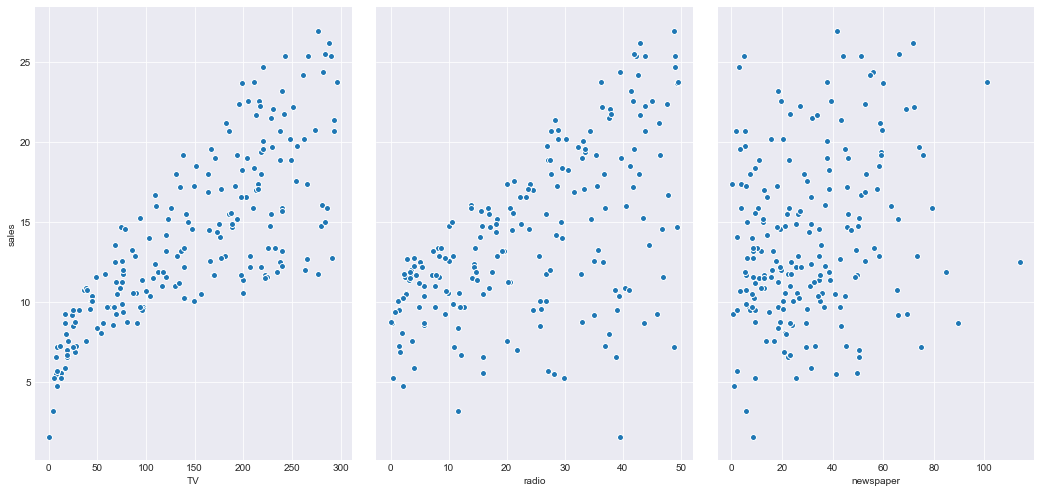

In [3]:
# Visualize the relationship between the features and the response
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size = 7, aspect=0.7)

## Questions about the dataset
1. Is there a relationship between the predictor and the response?
2.  How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?


# 3.1 Simple Linear Regression
Is the simplest method for supervised learning. It assumes that the dependency of $Y$ on $X_1, X_2...X_p$ is linear

We assumes a model
$$ Y = \beta_0 +\beta_1X+\epsilon$$
where Y is the response, X is the feature, $\beta_0$ and $\beta_1$ are 2 unknown constants that represents the intercept and slope, and $\epsilon$ is the error term

$$
\begin{align}
\hat{\beta_0} &= \bar{y}-\hat{\beta_1}\bar x \\
\hat{\beta_1} &= \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i-\bar x)^2}
\end{align}
$$

## 3.1.1 Estimating the coefficients
Coefficients are estimated by minimizing the least squares criterion
In this case we will use 2 different librarys, statsmodel and sklearn

In [4]:
# Using STATMODELS to estimate the relationship between TV and sale
# OLS: Ordinary least square
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [5]:
# Performance linear regression with mpg as the response and horsepower as the predictor
lm2 = skl_lm.LinearRegression()
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales
lm2.fit(X, y)
# Print the coefficients
print('Intercept: ', lm2.intercept_)
print('Coefficients: ', lm2.coef_)

Intercept:  7.032593549127693
Coefficients:  [0.04753664]


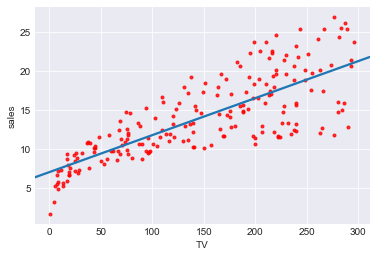

In [6]:
sns.regplot(data.TV, data.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})

## 3.1.2 Assessing the accuracy of the coeficient estimated

We compute the confidence intervals for the model coefficients

In [7]:
print("Confidence interval:")
lm1.conf_int()

Confidence interval:


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## 3.1.3 Hypthesis testing
To analyse the relatonship between the predictor and the response
- null hypothesis: $\beta_1 =0$
- alternative hypothesis: $\beta_1 \neq 0$ 
We reject the null hypothesis if there is p-value>0.05

In [8]:
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


As we can observe in the previous table, the p values is less than 0.05, so we can reject the null hypothesis: Sales is **Related** to the TV advertisement 

## 3.1.4 Assessing the overall accuracy of the model

To evaluate the overall fit of a lineal model, we use the R-squared value. $ R^2 $ statistic measure the linear relationship between X and Y, called correlation

$$ R^2=\frac{TSS-RSS}{TSS}= 1- \frac{RSS}{TSS} $$. 

TSS is the total sum square $ TSS = \sum(y_i-\bar{y})^2  $ and RSE is the residual standard error: $ RSE = \sqrt{RSS/(n-2)} $, where
$ RSS = \sum_{i=1}^{n}(y_i-\hat{y}_i)^2 $ is the residual sum of square

R-square is between 0 and 1. When higher is the value, more related.

In [9]:
print("R-square using statsmodel:",lm1.rsquared)
# sklearn LinearRegression has a method called score which 
# returns the coefficient of determination R^2 of the prediction.
print("R-square using sklearn:", lm2.score(X,y)) 

R-square using statsmodel: 0.611875050850071
R-square using sklearn: 0.611875050850071


**Is that a goog R2 value?**
It's hard to say, the th for a good R2 value depends widely on the domain, therefore, it's most useful as a tool for comparing different models

# 3.2 Multiple linear regression

$$ Y = \beta_0 +\beta_1 X_1+ \beta_2 X_2 +...+ \beta_p X_p\epsilon$$
where $ X_j $ represents $ j_{th} $ predictor and $ \beta_j $ quantify the association between the variable and the response. We interpret $ \beta_j $ as the average effect on Y of 1 unit increase in $ X_j $, holding all other predictors fixed.

In the case of Advertisement:
$$ sales = \beta_0 +\beta_1 *TV+ \beta_2 *radio + \beta_p *newspaper\epsilon$$

## 3.2.1 Estimating coefficients

In [10]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [11]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = skl_lm.LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


## 3.2.2 Is at least one of the predictors is useful in predicting Y?
If none of the predictors are useful:
$ H_0 = \beta_1=\beta_2 = ...\beta_p =0$
$ H_a: $ at least one $ B_j $ is non-zero
We can test the hypothesis by computing the F-statistic
Large F suggests that at least 1 of predictor are related to the response. How about F close to 1? It depends on the n and p:
- $\uparrow $ n: F is just a litter larger than 1 might still provide evidence against $ H_0 $
- $\downarrow $ n: F has to be large to reject $ H_0 $


In [12]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           1.58e-96
Time:                        13:57:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpreting the results**
The F score of this model is large, so at least 1 predictor are related to the response. 

TV and radio have small p-value, so we can reject the null hypothesis, however, the p-value of newspaper is quite high, so we can say that there is no assotiation between newspaper and sale.

The model has higher R2 value than the model which only includes TV ( 0.897 vs 0.611), so this model provides a better fit to the data.

## 3.2.3 Feature selection
- Forward selection: start a model with intercept but no predictors, fit p simple linear regression and add to the null model the variable that result in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new tow-variable model, iterate until some stop condition is satisfied.
- Backward selection: start with all variable and remove the variable with largest p-value. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. Continue until a stopping rule is reached. For instance, we may stop when all remaining variables have a significant p-value defined by some significance threshold.

---
In the previous steps we computed the regression model using only TV and using TV+radio+newspapers. For example, we can use backward selection, removing the newspaper and compute the regression using only TV and radio

In [13]:
lm1 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
print(lm1.pvalues)

Intercept    4.565557e-19
TV           5.436980e-82
radio        9.776972e-59
dtype: float64


We stop removing variables because all of remaining variables have a significant p-value(>0.05)

# 3.3 Other Considerations in the Regression Model

## 3.3.1 Qualitative predictors

In [14]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


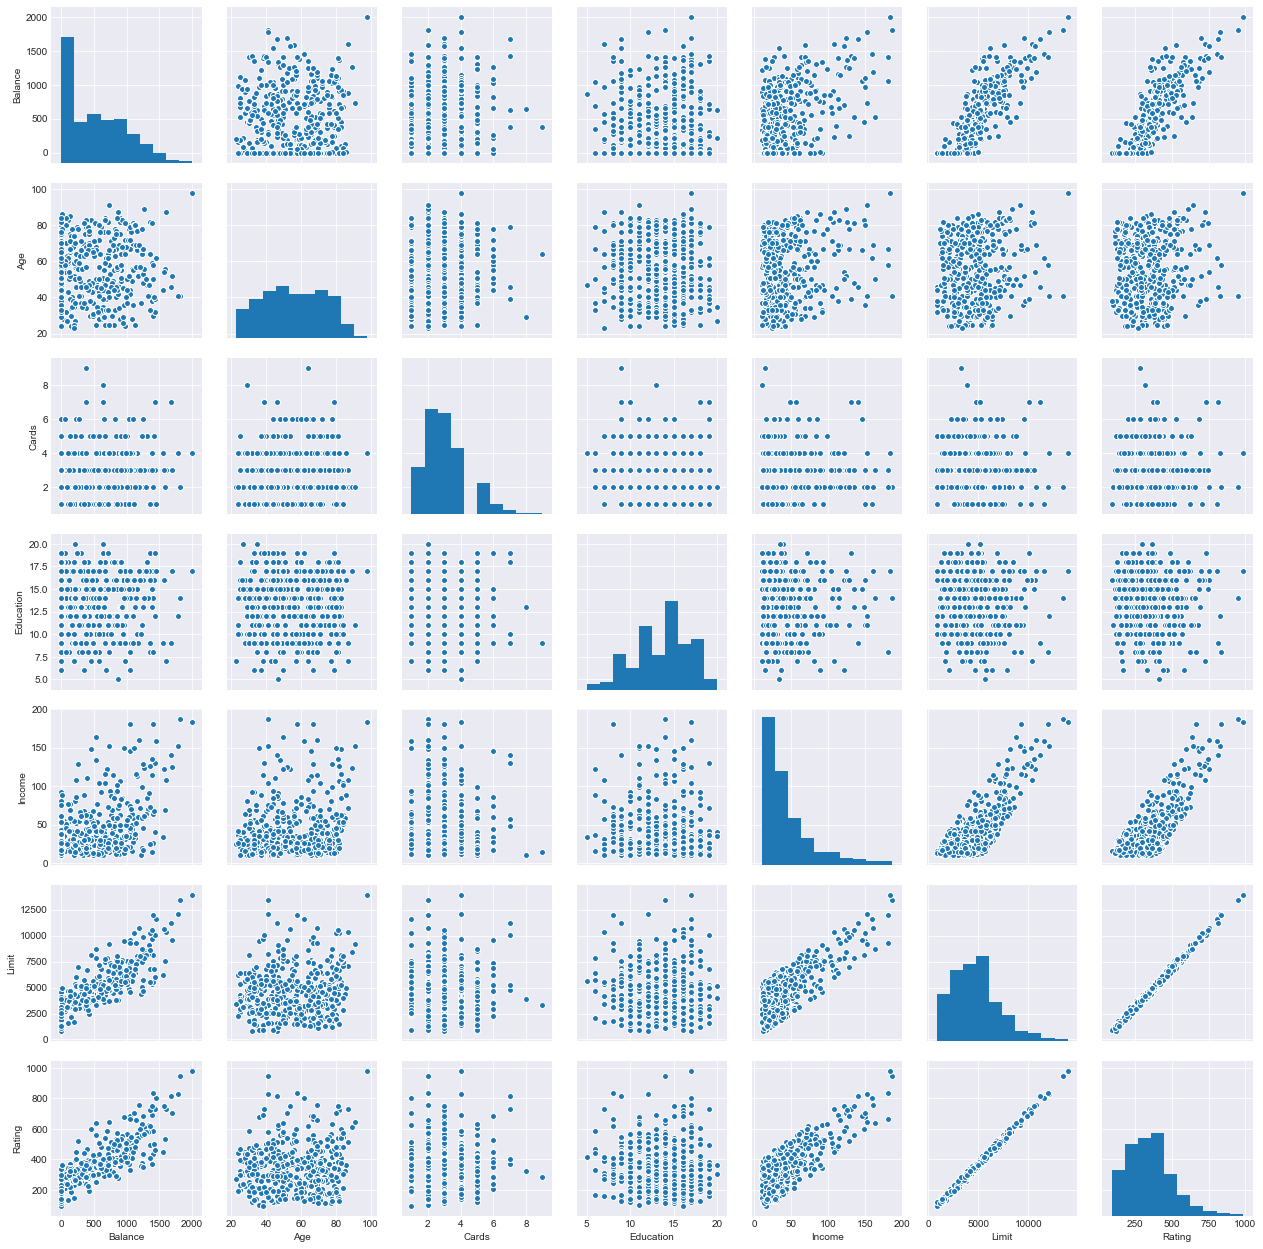

In [15]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

In [16]:
# create a fitted model with all three features
lm1 = smf.ols(formula='Balance ~ Gender' , data=credit).fit()

# print the coefficients
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,529.5362,31.988,16.554,0.000,466.649,592.423
Gender[T.Male],-19.7331,46.051,-0.429,0.669,-110.267,70.801


In [17]:
lm1 = smf.ols(formula='Balance ~ Ethnicity' , data=credit).fit()

# print the coefficients
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


## 3.3.2 Interactions and nonlinearity

In the case of Advertisement, we assumes that all variables are independent, however, there have some interaction between radio and TV

In [18]:
lm1 = smf.ols(formula='sales ~ TV + radio + TV*radio', data=data).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


The result in this table suggest that interaction is important, The p-value for the interaction term TV×radio is extremely low, indicating that there is strong evidence for HA :$\beta_3 \neq0$.